<a href="https://colab.research.google.com/github/DavoodSZ1993/Dive_into_Deep_Learning/blob/main/12_4_stochastic_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install d2l==1.0.0-alpha1.post0 --quiet

## 12.4 Stochastic Gradient Descent

In [9]:
%matplotlib inline
import math
import torch
from d2l import torch as d2l

### 12.4.1 Stochastic Gradient Updates

In [10]:
def f(x1, x2):
  return x1 ** 2 + 2 * x2 **2

def f_grad(x1, x2):
  return 2 * x1, 4 * x2

In [11]:
def sgd(x1, x2, s1, s2, f_grad):
  g1, g2 = f_grad(x1, x2)
  # Simulate noisy gradient
  g1 += torch.normal(0.0, 1, (1,))
  g2 += torch.normal(0.0, 1, (1,))
  eta_t = eta * lr()
  return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

epoch 50, x1: 0.296491, x2: 0.019612


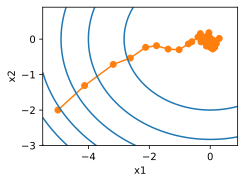

In [12]:
def constant_lr():
  return 1

eta = 0.1
lr = constant_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

### 12.4.2 Dynamic Learning Rate

epoch 1000, x1: -0.852198, x2: -0.078067


/usr/local/lib/python3.9/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


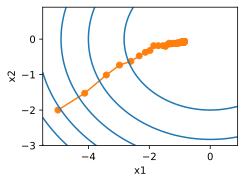

In [15]:
def exponential_lr():
  # Global variable that is defined outside this function and updated inside
  global t 
  t += 1
  return math.exp(-0.1 * t)

t = 1
lr = exponential_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=1000, f_grad=f_grad))

epoch 50, x1: -0.087809, x2: 0.037588


/usr/local/lib/python3.9/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


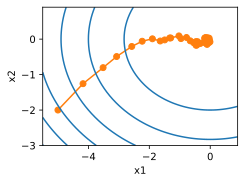

In [16]:
def polynomial_lr():
  # Global variable that is defined outside this function and updated inside
  global t
  t += 1
  return (1 + 0.1 * t) ** (-0.5)

t = 1
lr = polynomial_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))